In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

CREATE_CLASS=True # Create class from scratch; otherwise use nn.Sequential to create the class
SGD=False # SGD or Adam
IRIS=False # iris or mnist
SHOW=False # returns picture of digit for mnist

# Load Iris dataset
if IRIS:
    examples = load_iris()
else:
    examples = load_digits() # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
    if SHOW:
        idx=random.randint(0,len(examples.target))
        print(examples.data[idx])
        print(examples.data[idx].reshape(8,8))
        print(examples.target[idx])
        plt.matshow(examples.data[idx].reshape(8,8), cmap=plt.cm.gray_r)
        plt.show()

X = examples.data
y = examples.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters
input_size = X_train.shape[1]
hidden_size = 8
output_size = len(np.unique(y_train))
batch_size = 400
num_epochs = 200
learning_rate = 0.1
regularization_param = 0.001
momentum_param = 0.9
dropout_p = 0.25

# Create TensorFlow dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dropout(dropout_p),
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dropout(dropout_p),
    tf.keras.layers.Dense(output_size)
])

# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=momentum_param, decay=regularization_param)

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# Define training and testing steps
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(inputs, labels):
    predictions = model(inputs)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Training loop
for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for inputs, labels in train_ds:
        train_step(inputs, labels)

    for test_inputs, test_labels in test_ds:
        test_step(test_inputs, test_labels)

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.result()}, Test Loss: {test_loss.result()}')

# Testing the model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.Adam.

Epoch [100/200], Train Loss: 0.00949422363191843, Test Loss: 0.6792945265769958
Epoch [200/200], Train Loss: 0.004412155598402023, Test Loss: 0.8277527689933777
12/12 [==============================] - 0s 2ms/step
Accuracy on test set: 0.9417


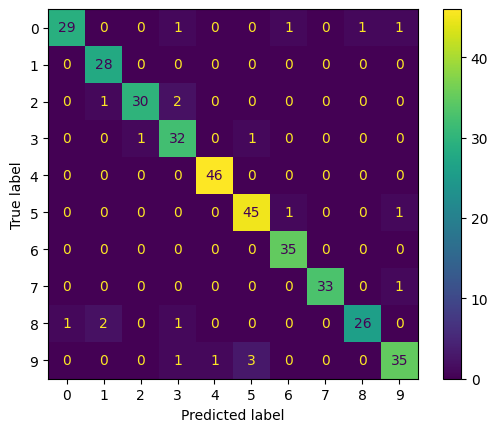

In [2]:
import tensorflow as tf
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

CREATE_CLASS=True # Create class from scratch; otherwise use nn.Sequential to create the class
SGD=False # SGD or Adam
IRIS=False # iris or mnist
SHOW=False # returns picture of digit for mnist

# Load Iris dataset
if IRIS:
    examples = load_iris()
else:
    examples = load_digits() # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
    if SHOW:
        idx=random.randint(0,len(examples.target))
        print(examples.data[idx])
        print(examples.data[idx].reshape(8,8))
        print(examples.target[idx])
        plt.matshow(examples.data[idx].reshape(8,8), cmap=plt.cm.gray_r)
        plt.show()

X = examples.data
y = examples.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model parameters
input_size = X_train.shape[1]
hidden_size = 8
output_size = len(np.unique(y_train))
batch_size = 400
num_epochs = 200
learning_rate = 0.1
regularization_param = 0.001
momentum_param = 0.9
dropout_p = 0.25

# Create TensorFlow dataset
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dropout(dropout_p),
    tf.keras.layers.Dense(hidden_size, activation='relu'),
    tf.keras.layers.Dropout(dropout_p),
    tf.keras.layers.Dense(output_size)
])

# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate, beta_1=momentum_param)

# Define metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

# Define training and testing steps
@tf.function
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

@tf.function
def test_step(inputs, labels):
    predictions = model(inputs)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

# Training loop
for epoch in range(num_epochs):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

    for inputs, labels in train_ds:
        train_step(inputs, labels)

    for test_inputs, test_labels in test_ds:
        test_step(test_inputs, test_labels)

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.result()}, Test Loss: {test_loss.result()}')

# Testing the model
y_pred = np.argmax(model.predict(X_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()
